In [1]:
from MFEA_lib.model import SMP_MFEA
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Funcs import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark


#### Benchmark

In [8]:
ls_benchmark = []
ls_IndClass = []
name_benchmark = []

for i in range(3, 11, 7):
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)


In [10]:
t, ic = CEC17_benchmark.get_10tasks_benchmark()

ls_benchmark = [t]
ls_IndClass = [ic]
name_benchmark = ["cec17"]

In [7]:
ls_benchmark = []
ls_IndClass = []
name_benchmark = []

for i in range(3, 11, 7):
    t, ic = WCCI22_benchmark.get_50tasks_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)

pm, lr, prob_search, N_min, len_mem, SHADE/L_SHADE

In [3]:
smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)

smpModel.compile(
    crossover= SBX_Crossover(nc = 2, gamma= 0.4, alpha = 6),
    # mutation = GaussMutation(scale= 0.1),
    # mutation = Directional_Mutation(),
    # mutation = Directional_Mutation_v2(pm = 1/25),
    mutation = Polynomial_Mutation(nm = 7, pm= 1),
    selection= ElitismSelection(random_percent= 0.),
    search= L_SHADE(len_mem= 6),
    attr_tasks = ['crossover', 'mutation'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0., prob_search = 0.4,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,
    save_path= './RESULTS/result/WCCI22_complex/SMP_v2/'
    # save_path= './RESULTS/result/GECCO20/SMP_v2/'
)


Time: 01m 37.23s  100 % [====================>]  Pop_size: 5.80E+01  ,  Cost: 6.05E+02  6.06E+02  ,  
[0.5 0.5]
[ 99771. 100257.]
END!
DONE!
Saved
Time: 01m 11.47s  100 % [====================>]  Pop_size: 5.80E+01  ,  Cost: 7.00E+02  7.00E+02  ,  
[0.5 0.5]
[100145.  99883.]
END!
DONE!
Saved
Time: 00m 1.85s    2 % [>                   ]  Pop_size: 1.96E+02  ,  Cost: 5.87E+07  4.92E+07  ,  

AttributeError: 'model' object has no attribute 'last_pop'

##### Complex

In [5]:
# SMP_v2 = loadModel('./RESULTS/result/WCCI22_complex/SMP_v2/1.mso', ls_tasks= t)
# SMP_v2.render_smp()

In [4]:
compare = CompareResultBenchmark(
    path_folder="./RESULTS/result/WCCI22_complex", 
    ls_benchmark= ls_benchmark
)
compare.load_folder()

(0 : LSA_COMPLEX)
(1 : LSA_21)
(2 : MFEA_COMPLEX)
(3 : MFEA1_COMPLEX)
(4 : SMP_COMPLEX_FINAL_CEC10)
(5 : SMP_v2)
(0 : LSA_COMPLEX)
(1 : LSA_21)
(2 : MFEA_COMPLEX)
(3 : MFEA1_COMPLEX)
(4 : SMP_COMPLEX_FINAL_CEC10)
(5 : SMP_v2)


In [5]:
compare.summarizing_compare_result(idx_main_algo= 5)

['LSA_COMPLEX', 'LSA_21', 'MFEA_COMPLEX', 'MFEA1_COMPLEX', 'SMP_COMPLEX_FINAL_CEC10', 'SMP_v2']


Better  Equal  Worse
SMP_v2 vs LSA_COMPLEX                  17      0      3
SMP_v2 vs LSA_21                       13      0      7
SMP_v2 vs MFEA_COMPLEX                 18      0      2
SMP_v2 vs MFEA1_COMPLEX                18      0      2
SMP_v2 vs SMP_COMPLEX_FINAL_CEC10      18      0      2

In [6]:
compare.show_compare_detail(idx_main_algo=0)


Benchmark:  1
               LSA_COMPLEX             LSA_21       MFEA_COMPLEX      MFEA1_COMPLEX SMP_COMPLEX_FINAL_CEC10                SMP_v2
Tasks1   612.7801631385278  608.0086430666668  641.2352856497579   608.908779636078       621.3871000886592  (+)605.3740186553708
Tasks2   621.3176276249004  607.8913740333334  641.3703910199642  608.9714738198566        621.362117720952  (+)605.5816258804119
Compare                0/2                0/2                0/2                0/2                     0/2                   2/2

Benchmark:  2
                  LSA_COMPLEX             LSA_21       MFEA_COMPLEX      MFEA1_COMPLEX SMP_COMPLEX_FINAL_CEC10             SMP_v2
Tasks1   (+)700.0000000010339        700.0025424   700.002784505369  700.0063009450764       700.0010681802964  700.0147797767563
Tasks2      700.0073960406381  700.0032844333333  700.0012369534385  700.0058490107581    (+)700.0000000003308  700.0123160725202
Compare                   1/2                0/2             

##### cec17

In [ ]:
SMP_newSBX.history_cost[-1]

array([5.10323586e-26, 4.76598204e-27, 0.00000000e+00, 0.00000000e+00,
       5.86800309e-16, 2.99316127e-14, 0.00000000e+00, 6.36378325e-04,
       0.00000000e+00, 0.00000000e+00])

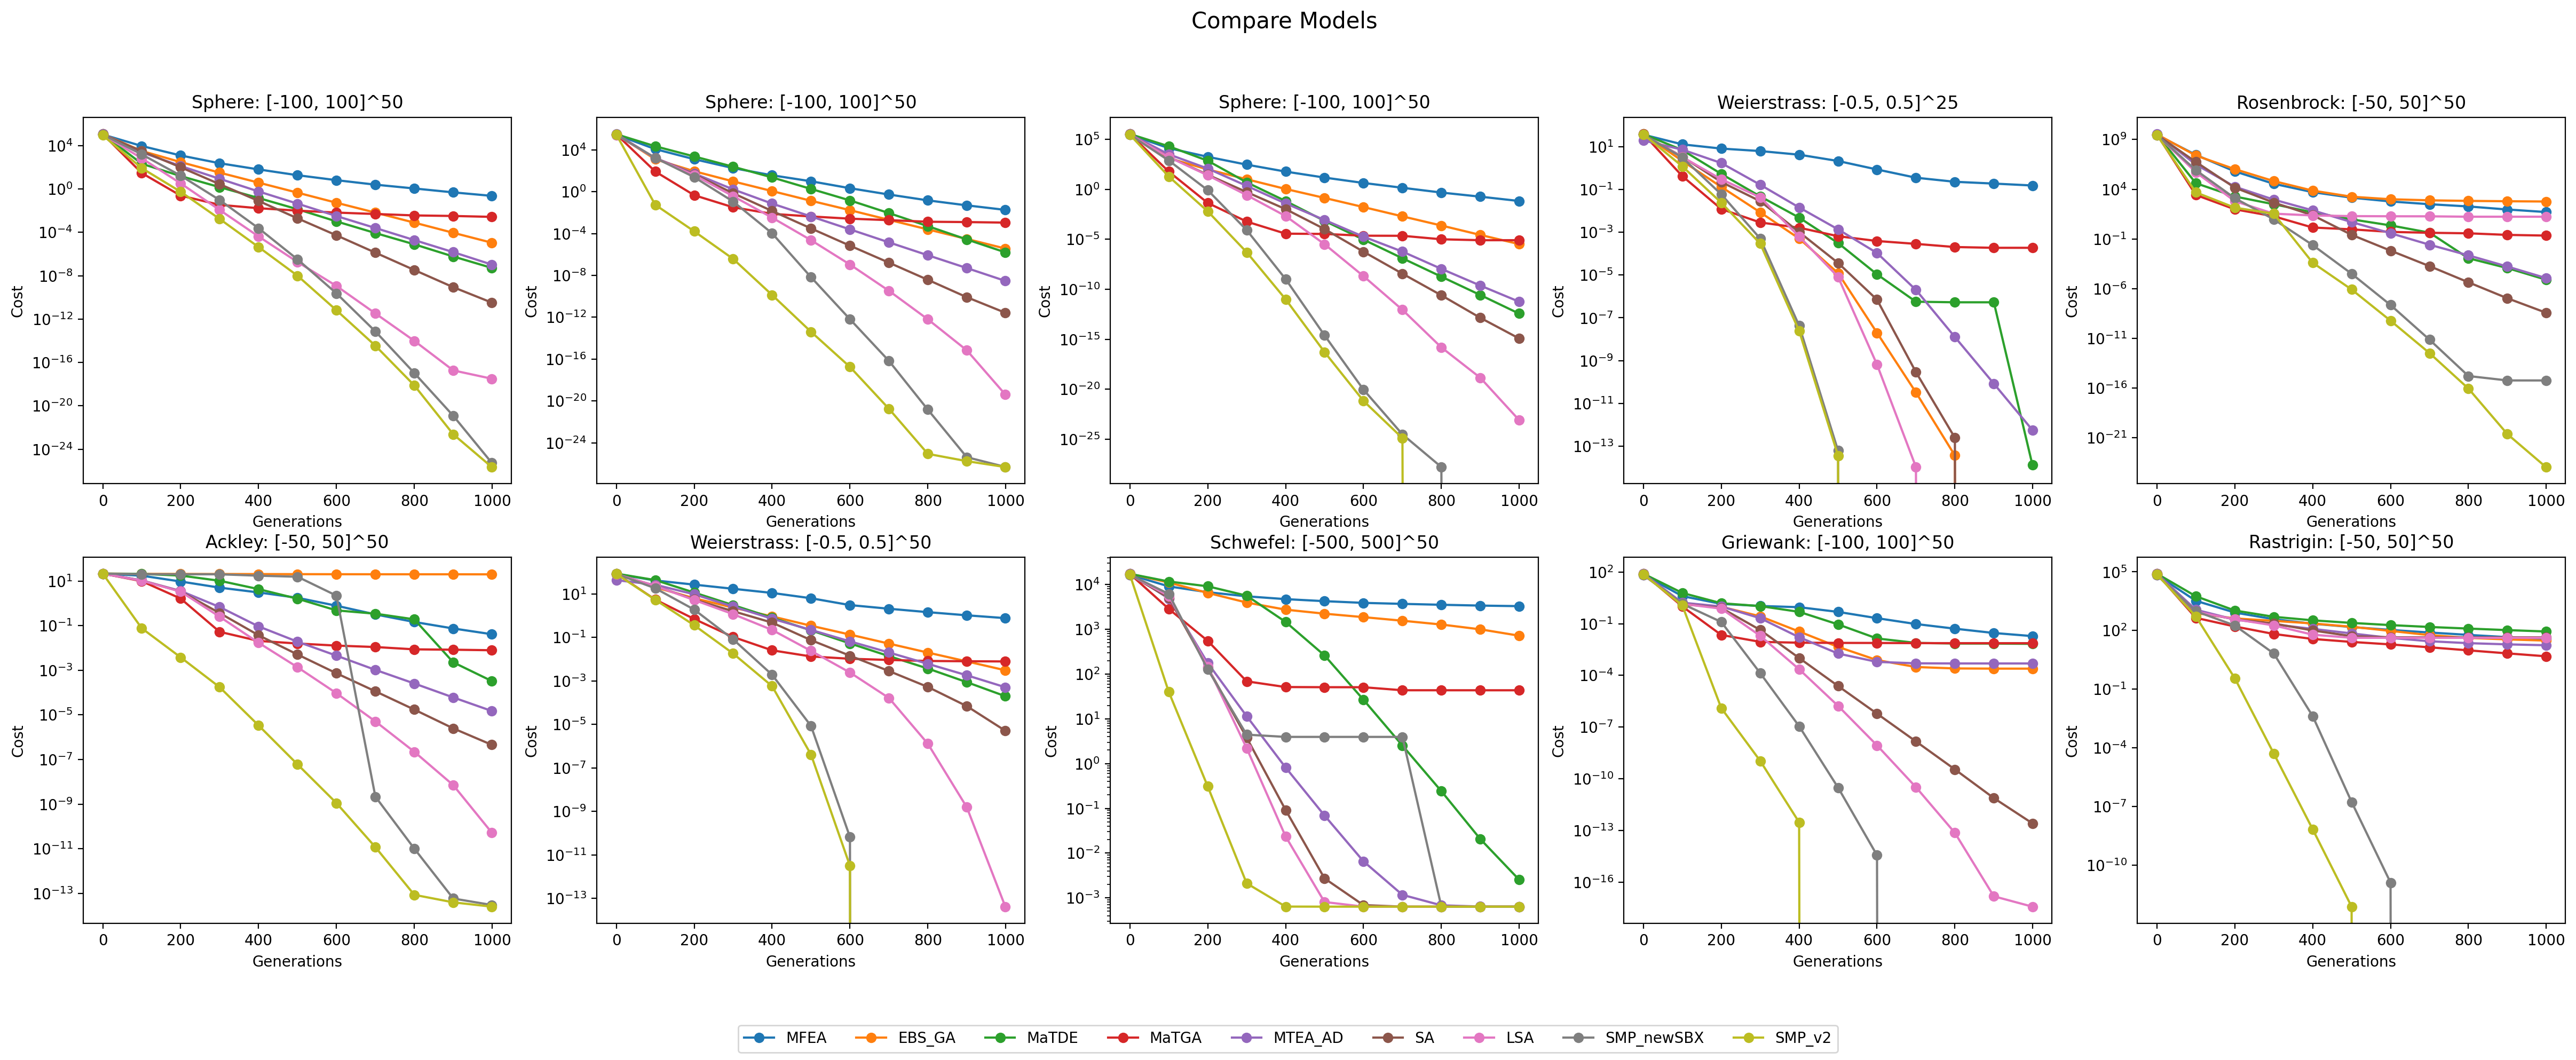

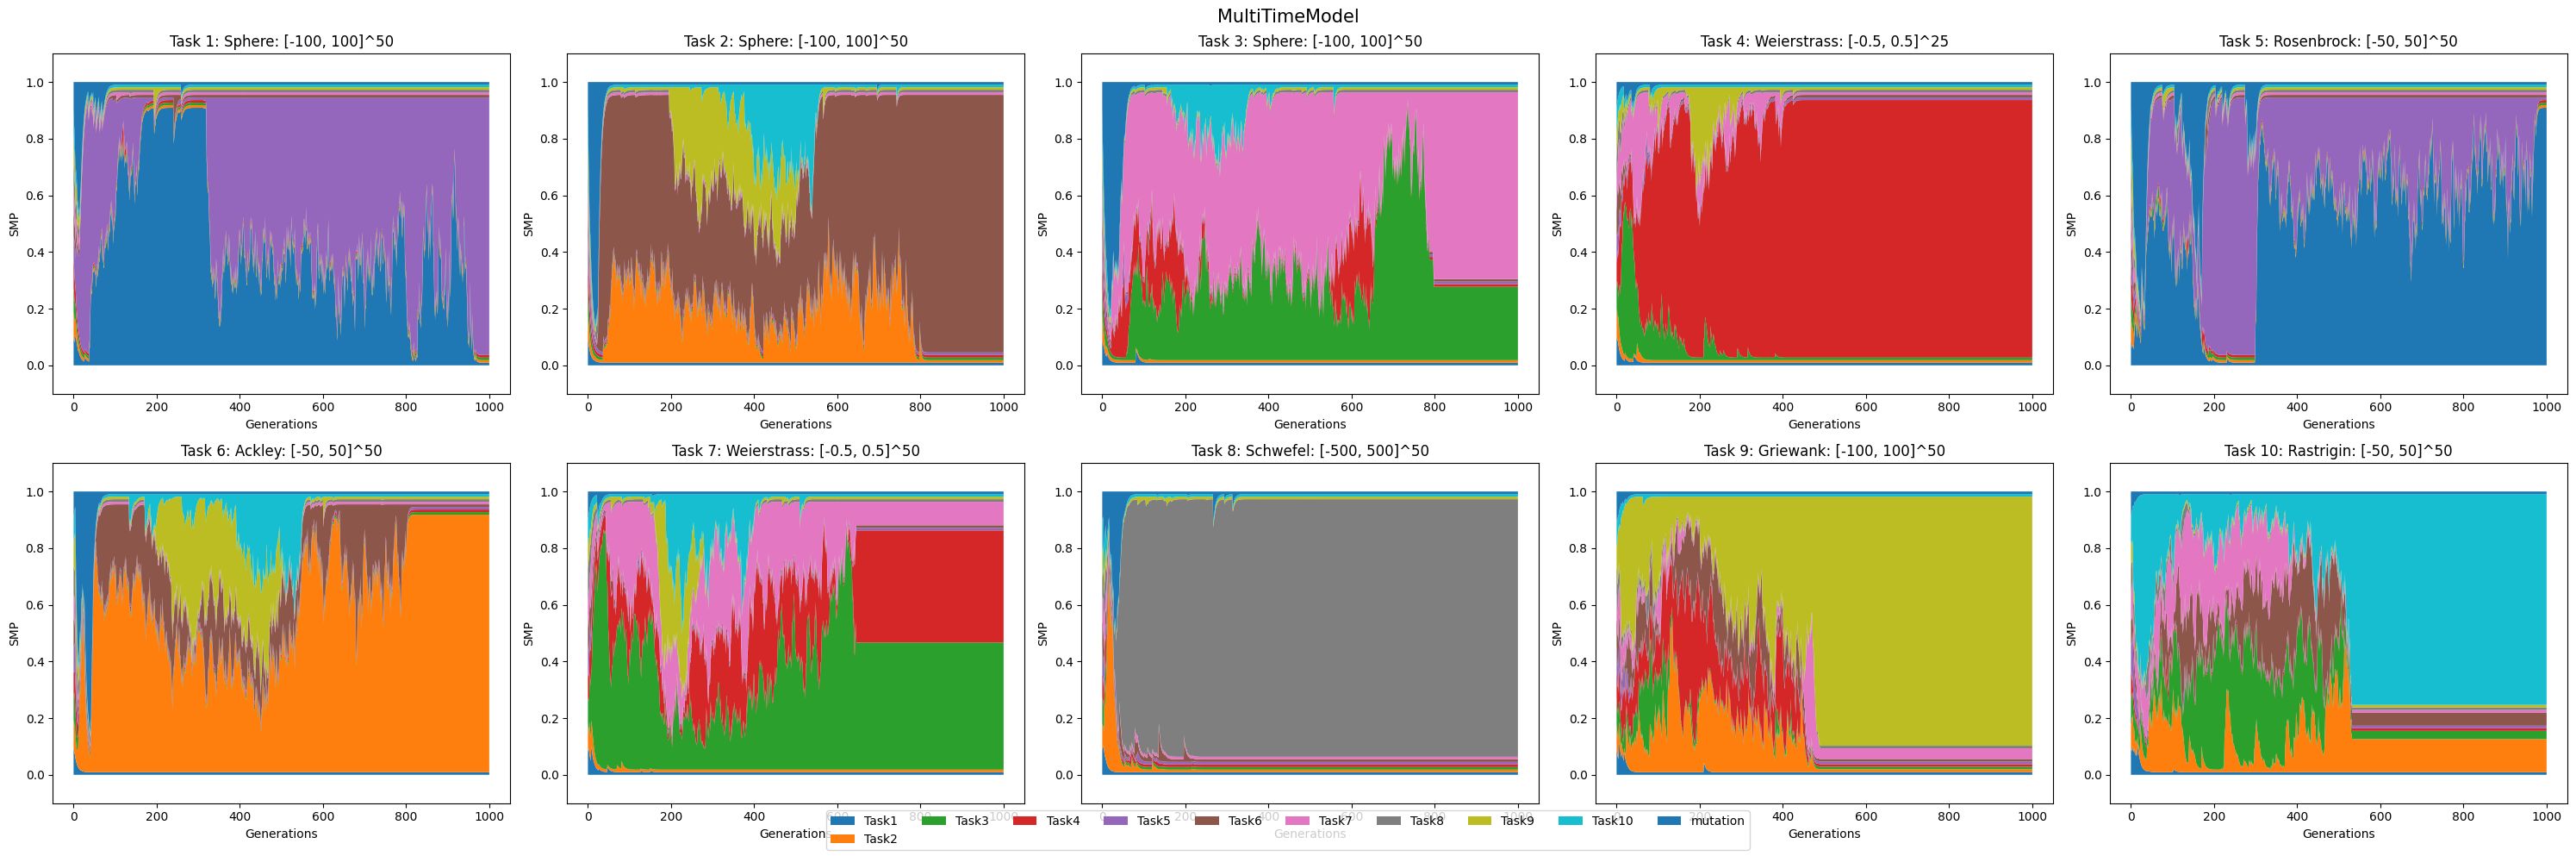

In [ ]:
t, ic = CEC17_benchmark.get_10tasks_benchmark()

MFEA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MFEA_cec17.mso', ls_tasks= t)
EBS_GA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/EBS_GA_cec17.mso', ls_tasks= t)
MaTDE_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTDE_cec17.mso', ls_tasks= t)
MaTGA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTGA_cec17.mso', ls_tasks= t)
MTEA_AD_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MTEA_AD_cec17.mso', ls_tasks= t)
SA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/SA_cec17.mso', ls_tasks= t)
LSA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/LSA_cec17.mso', ls_tasks= t)
SMP_newSBX = loadModel('./RESULTS/__static__/CEC17_10tasks/SMP_NEWSBX.mso', ls_tasks= t)
SMP_v2 = loadModel('./RESULTS/result/WCCI22_complex/SMP_v2/cec17.mso', ls_tasks= t)

compare = CompareModel(
    models = [MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model, SA_model, LSA_model, SMP_newSBX, SMP_v2],
    label= [...] * 7 + ['SMP_newSBX', 'SMP_v2'],
)
compare.render(    
    shape = (2, 5),
    min_cost= 0,
    step= 100,
    yscale= 'log'
)

# SMP_newSBX.render_smp(shape= (3, 5), step = 1)
SMP_v2.render_smp(shape= (2, 5), step = 1)
print()

30 times

In [ ]:
# smpModel = MultiTimeModel(model= SMP_MFEA)
# smpModel.compile(
#     tasks= cec17_10tasks,
#     crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
#     # mutation= NoMutation(),
#     mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
#     selection= ElitismSelection(random_percent= 0.),
# )
# smpModel.fit(
#     nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 20,
#     lr = 1.5, p_const_intra= 0.3, p_mutate= 0.,
#     nb_epochs_stop= 50, 
#     evaluate_initial_skillFactor= True
# )
# smpModel.run(
#     nb_run= 30,
#     save_path= './RESULTS/smpMFEA_cec17.mso'
# )

In [ ]:
# smpModel.render_history(shape = (2, 5), yscale= 'log')
# print()

In [ ]:
# smpModel.render_smp(step = 1, get_host= True)
# print()

##### GECCO20

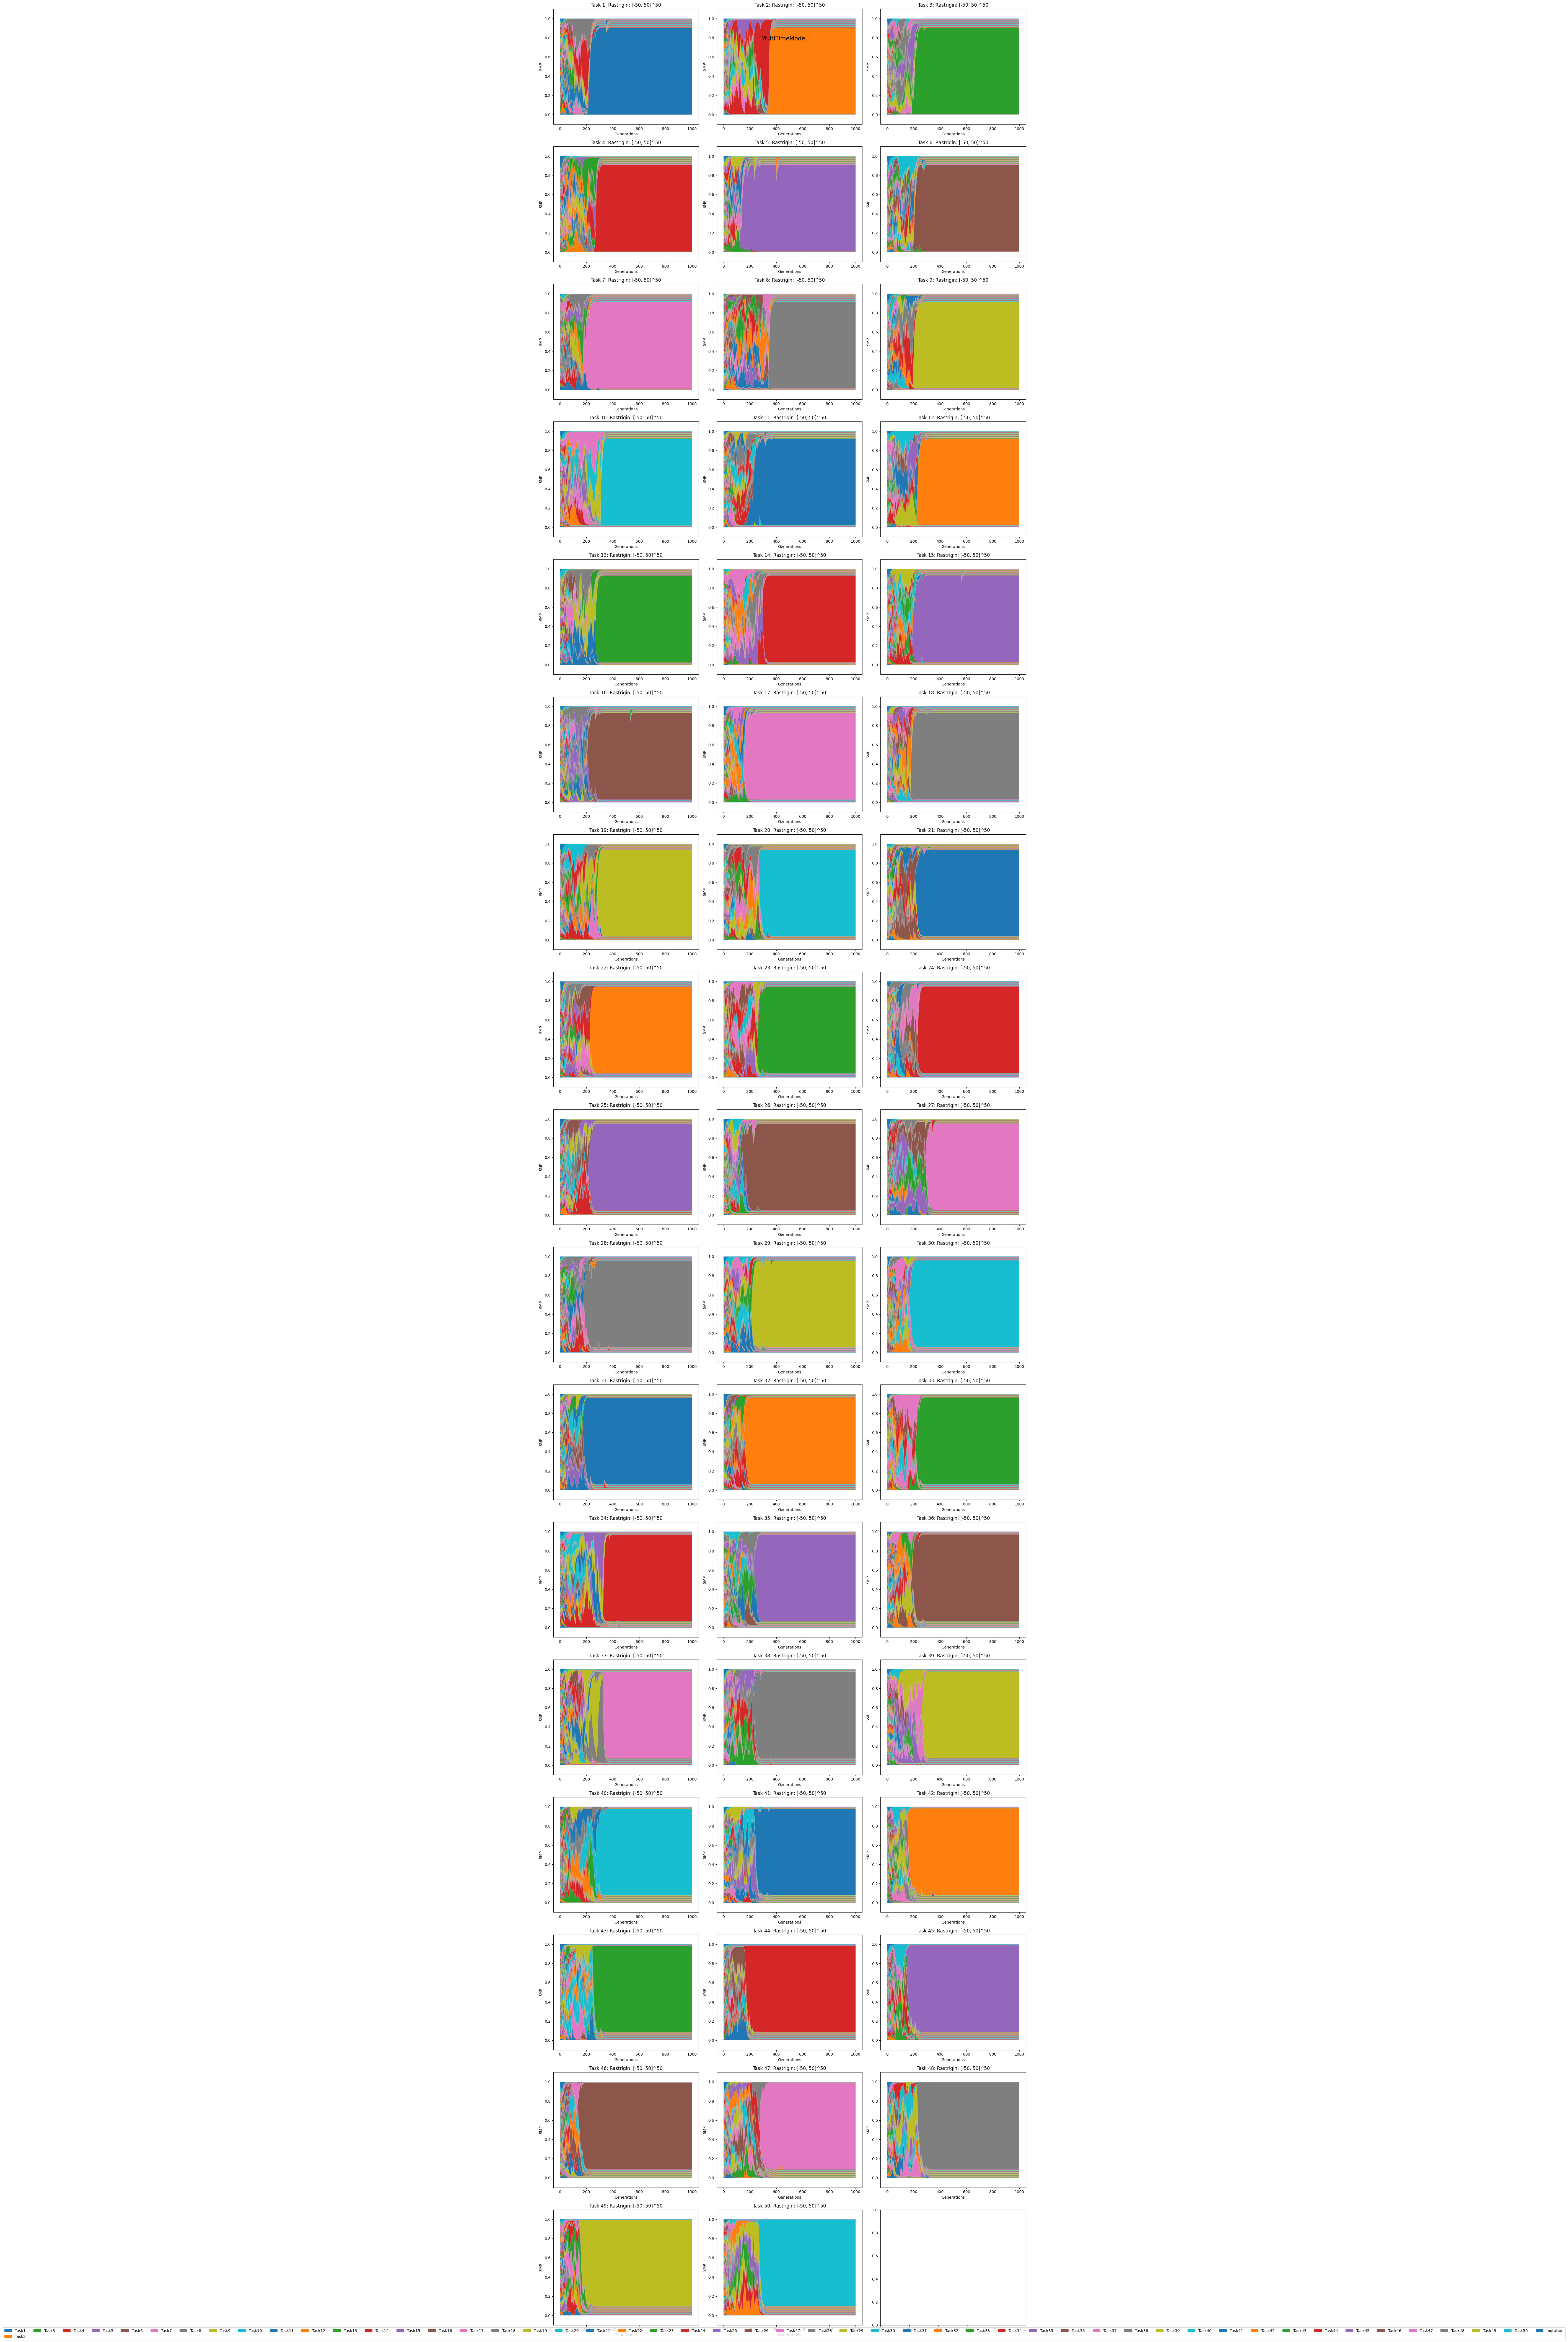

In [17]:
SMP_v2 = loadModel('./RESULTS/result/GECCO20/SMP_v2/3.mso', ls_tasks= t)
SMP_v2.render_smp()

In [34]:
compare = CompareResultBenchmark(
    path_folder="./RESULTS/result/GECCO20/", 
    ls_benchmark= ls_benchmark
)
compare.load_folder()

(0 : LSA_2021)
(1 : SMP_v2)
(0 : LSA_2021)
(1 : SMP_v2)


In [35]:
len(ls_benchmark)

1

In [37]:
compare.summarizing_compare_result(idx_main_algo= 1)

['LSA_2021', 'SMP_v2']


Better  Equal  Worse
SMP_v2 vs LSA_2021       3      0     47

In [38]:
compare.show_compare_detail(idx_main_algo=1)

Benchmark:  1
                        SMP_v2               LSA_2021
Tasks1       77.60672076491426   (+)54.88852239999999
Tasks2       64.67228833287317   (+)60.26129203333332
Tasks3       59.69750312304495  (+)57.176917366666665
Tasks4       69.64703314927254  (+)58.006056233333325
Tasks5      116.40991185674925   (+)57.77389839999999
Tasks6       65.66722215543297   (+)60.69243906666667
Tasks7      115.41491222333002   (+)57.04432996666667
Tasks8       88.55117430972842  (+)59.365828366666655
Tasks9       93.52593932284225   (+)56.38095746666666
Tasks10      75.61672168097289   (+)51.33984316666667
Tasks11       67.6571402696195   (+)59.83013919999999
Tasks12      72.63192547944783  (+)59.664318433333335
Tasks13      90.54114815913624  (+)56.181973899999996
Tasks14      73.62686937764579   (+)57.80706013333331
Tasks15      84.57135846096674   (+)53.36292236666666
Tasks16       89.5462143365765   (+)55.02118236666667
Tasks17      84.57134815699351  (+)56.977931200000015
Tasks18      9